In [23]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch.utils.data import TensorDataset, DataLoader

In [4]:
# Load the dataset
file_path = '/content/diabetes.csv'  # Adjust the path if necessary
data = pd.read_csv(file_path)


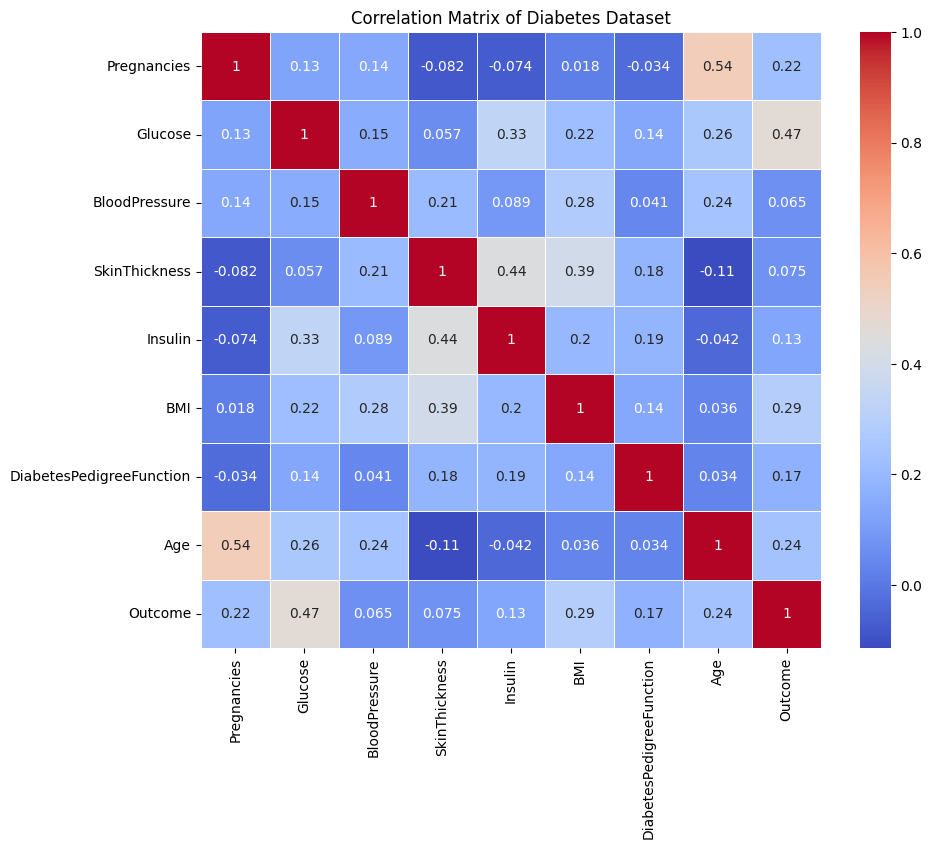

In [31]:
#  Correlation Matrix and Heatmap
plt.figure(figsize=(10,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()



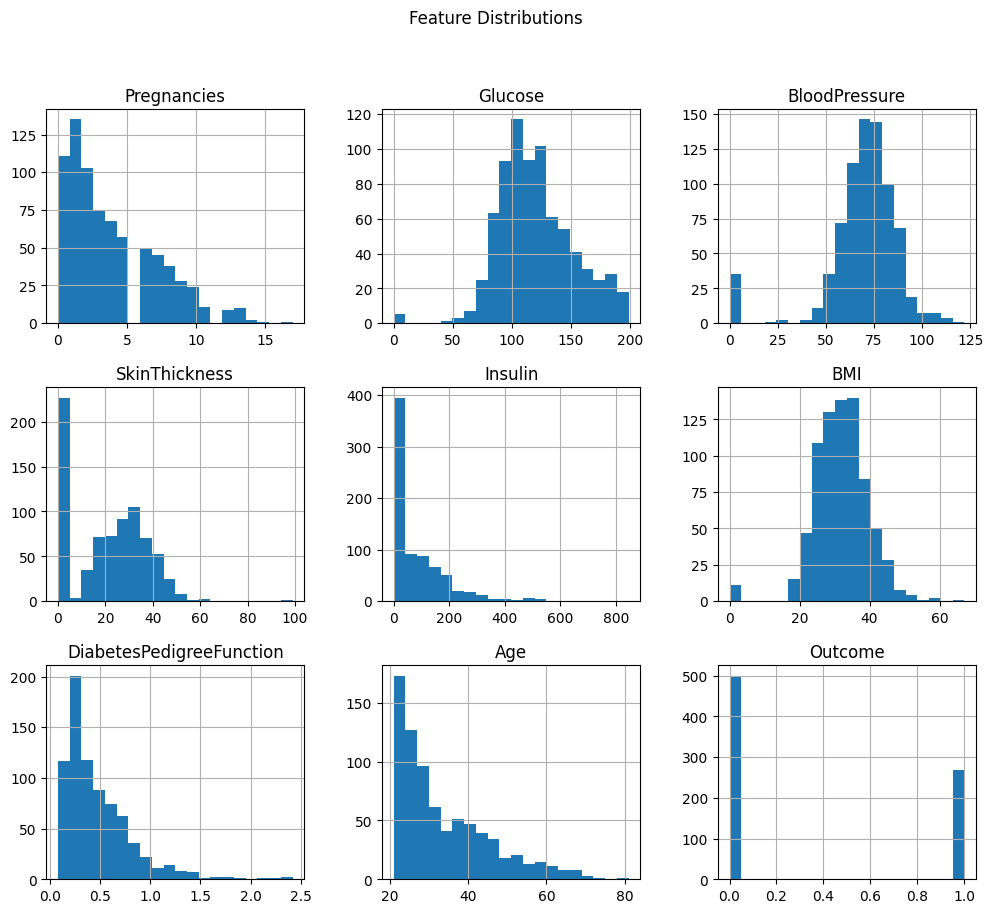

In [32]:
# 2. Feature Distribution
data.hist(figsize=(12,10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()


In [20]:
# Separate features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Convert the features and target to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [25]:
import torch.nn as nn

# Define a simple Perceptron model
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.layer = nn.Linear(X_train.shape[1], 1)
    def forward(self, x):
        return torch.sigmoid(self.layer(x))

# Initialize the model
model = Perceptron()


In [27]:
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [28]:
# Training loop
epochs = 100

for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  # Reset gradients to zero
        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_y)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

    # Print progress every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 10/100, Loss: 0.43415722250938416
Epoch 20/100, Loss: 0.5712014436721802
Epoch 30/100, Loss: 0.5196573138237
Epoch 40/100, Loss: 0.3004363477230072
Epoch 50/100, Loss: 0.4255119264125824
Epoch 60/100, Loss: 0.48994410037994385
Epoch 70/100, Loss: 0.549153745174408
Epoch 80/100, Loss: 0.24466080963611603
Epoch 90/100, Loss: 0.36946985125541687
Epoch 100/100, Loss: 0.5007390379905701


In [29]:
# Evaluate on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No need to track gradients during evaluation
    test_outputs = model(X_test_tensor)
    predicted = (test_outputs > 0.5).float()  # Convert probabilities to binary outputs
    accuracy = (predicted.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])) * 100
    print(f'Test Accuracy: {accuracy.item():.2f}%')


Test Accuracy: 74.68%


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Convert predictions to numpy for evaluation
y_pred = (model(X_test_tensor) > 0.5).float()  # Threshold at 0.5 for binary classification
y_pred_numpy = y_pred.numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_numpy)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_numpy)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_numpy)
print("\nClassification Report:\n", class_report)


Accuracy: 0.7468

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



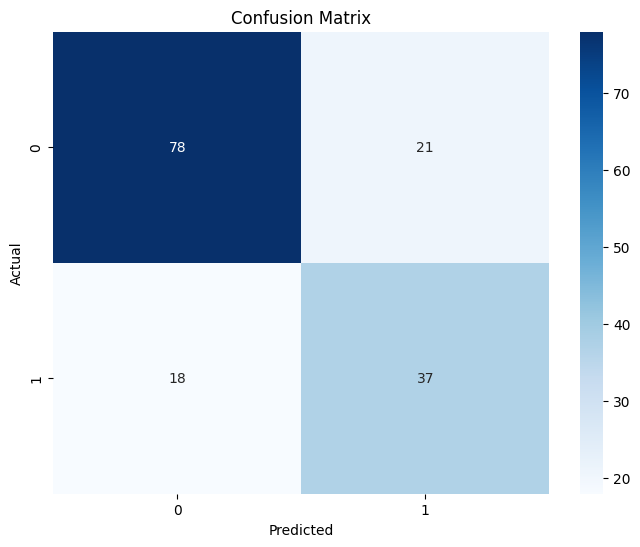

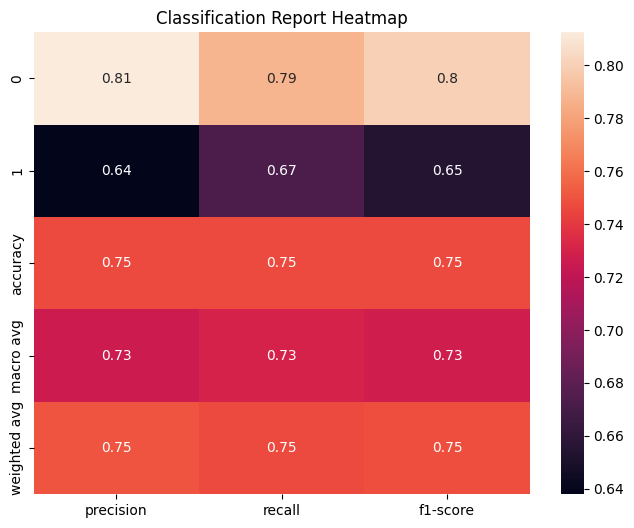

In [35]:

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Plotting metrics: Precision, Recall, and F1-Score for each class
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred_numpy, output_dict=True)).iloc[:-1, :].T, annot=True)
plt.title("Classification Report Heatmap")
plt.show()
